### Set up authentication for google. This is required to pull data from bigquery

In [ ]:
from google.colab import auth
auth.authenticate_user()

###Import necessary libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


###Pull the dataframe from bigquery

In [ ]:
#Please change the query to pull appropriate data
%%bigquery df --project ml-notebooks-324808 --verbose
select * 
from `linear_regression.car_dekho`

Executing query with job ID: 1a6e7a05-4b99-40b3-96be-3df42bd6fe37
Query executing: 0.36s
Query complete after 0.67s


#Exploratory data analysis


###Determine the following:

- The number of data points (rows). (Hint: check out the dataframe .shape attribute.)

- The column names. (Hint: check out the dataframe .columns attribute.)

- The data types for each column. (Hint: check out the dataframe .dtypes attribute.)

In [ ]:
print(f'Number of rows: {df.shape[0]} ')
print(f'Column names: {df.columns}')
print(f'Data Types for each column:{df.dtypes}')

Number of rows: 4340 
Column names: Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')
Data Types for each column:name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object


In [ ]:
#Observer the data 
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC BSII,1992,50000,100000,Petrol,Individual,Manual,Fourth & Above Owner
1,Maruti Gypsy E MG410W ST,1995,95000,100000,Petrol,Individual,Manual,Second Owner
2,Mahindra Jeep MM 540,1996,200000,60000,Diesel,Individual,Manual,First Owner
3,Mahindra Jeep CL 500 MDI,1996,250000,35000,Diesel,Individual,Manual,Second Owner
4,Maruti 800 Std,1997,50000,80000,Petrol,Individual,Manual,Second Owner
5,Maruti Esteem AX,1997,79000,70000,Petrol,Individual,Automatic,First Owner
6,Mahindra Jeep CL 500 MDI,1997,150000,120000,Diesel,Individual,Manual,Third Owner
7,Maruti Zen LX,1998,42000,70000,Petrol,Individual,Manual,Third Owner
8,Maruti Zen LX,1998,42000,70000,Petrol,Individual,Manual,Third Owner
9,Maruti 800 Std,1998,40000,40000,Petrol,Individual,Manual,Fourth & Above Owner


###Determine the following:

- The number of each species present. (Hint: check out the series .value_counts method.)

- The mean, median, and quantiles and ranges (max-min).

- Hint: for the last question, the .describe method does have median, but it's not called median. It's the 50% quantile. .describe does not have range though, and in order to get the range, you will need to create a new entry in the .describe table, which is max - min.

In [ ]:
# Calculate number of each name
df.name.value_counts()

Maruti Swift Dzire VDI                69
Maruti Alto 800 LXI                   59
Maruti Alto LXi                       47
Hyundai EON Era Plus                  35
Maruti Alto LX                        35
                                      ..
Honda Civic 1.8 MT Sport               1
Mahindra Bolero B4                     1
Hyundai i20 Active 1.4 SX with AVN     1
Tata Aria Pleasure 4x2                 1
Ford Ecosport 1.5 DV5 MT Trend         1
Name: name, Length: 1491, dtype: int64

In [ ]:
# Select just the rows desired from the 'describe' method and add in the 'median'
stats_df = df.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%','range']
stats_df = stats_df.loc[out_fields]

stats_df.rename({'50%':'median','25%':'q25','75%':'q75'},inplace=True)

stats_df.loc['iqr'] = stats_df.loc['q75'] - stats_df.loc['q25']

stats_df.T

,mean,q25,median,q75,range,iqr
year,2013.090783,2011.00,2014.0,2016.0,28.0,5.00
selling_price,504127.311751,208749.75,350000.0,600000.0,8880000.0,391250.25
km_driven,66215.777419,35000.00,60000.0,90000.0,806598.0,55000.00


Calculate the following for each name in a separate dataframe:

The mean of each measurement .

The median of each of these measurements.

If you finish both of these, try calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on applying multiple functions at once for a hint.

In [ ]:
#applying multiple functions at once - 2 methods
df.groupby('transmission').agg(['mean','median'])
df.groupby('name').agg(['mean','median'])
df.groupby(['fuel','name']).agg(['mean','median'])


year  ... km_driven
                                                 mean  ...    median
fuel   name                                            ...          
CNG    Chevrolet Aveo 1.4 CNG                  2011.0  ...  100000.0
       Hyundai Accent Executive CNG            2011.0  ...   88500.0
       Hyundai Accent GLE CNG                  2009.5  ...   80000.0
       Hyundai Santro AT CNG                   2005.0  ...  110000.0
       Hyundai Santro Magna CNG BSIV           2019.0  ...   10000.0
...                                               ...  ...       ...
Petrol Volkswagen Vento 1.0 TSI Highline Plus  2011.0  ...   53000.0
       Volkswagen Vento 1.6 Highline           2013.5  ...   63887.5
       Volkswagen Vento Magnific 1.6 Highline  2013.0  ...   97248.0
       Volkswagen Vento Petrol Highline        2011.0  ...   75000.0
       Volkswagen Vento Petrol Highline AT     2011.0  ...   73129.5

[1491 rows x 6 columns]

## Plots

[Text(0, 0.5, 'Selling Price'),
 Text(0.5, 0, 'Fuel Type'),
 Text(0.5, 1.0, 'Fuel Type vs Selling Price')]

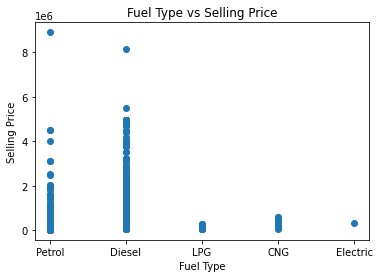

In [ ]:
# Make scatter plots
ax = plt.axes()
ax.scatter(df.fuel,df.selling_price)

#label the axis
ax.set(xlabel='Fuel Type',
       ylabel='Selling Price',
       title = 'Fuel Type vs Selling Price'
       )

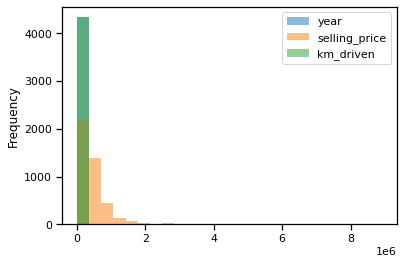

In [ ]:
sns.set_context('notebook')
### BEGIN SOLUTION
# This uses the `.plot.hist` method
ax = df.plot.hist(bins=25, alpha=0.5)
#ax.set_xlabel('Size (cm)');

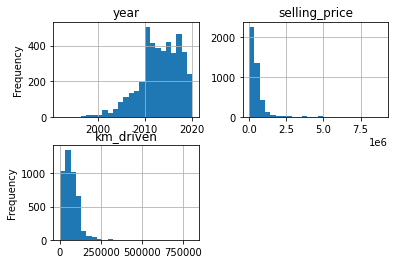

In [ ]:
# To create four separate plots, use Pandas `.hist` method
axList = df.hist(bins=25)

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
#    if ax.is_last_row():
#        ax.set_xlabel('Size (cm)')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')
### END SOLUTION

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

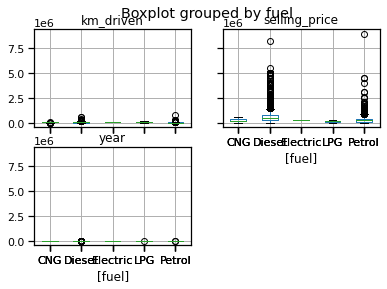

In [ ]:
### BEGIN SOLUTION
# Here we have four separate plots
df.boxplot(by='fuel');
### END SOLUTION

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


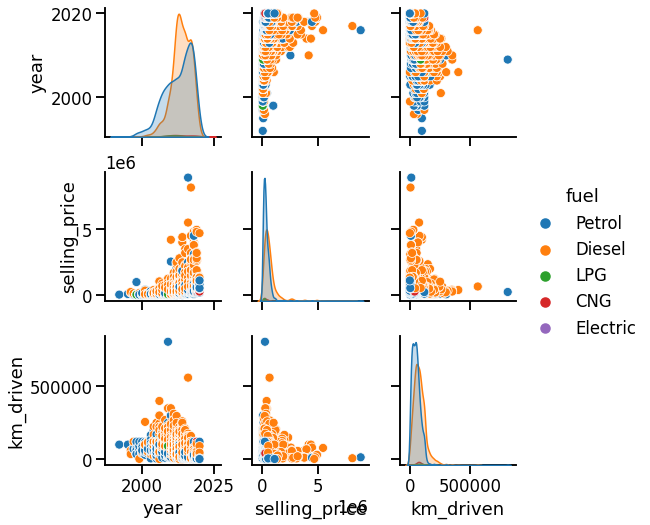

In [ ]:
sns.set_context('talk')
sns.pairplot(df, hue='fuel')

###Explore the Target

In [ ]:
#sns.displot(np.log(df.selling_price))
#sns.kdeplot(np.log(df.selling_price))

In [ ]:
#sns.distplot(np.log(df.selling_price), hist=True,kde=True) 
#sns.histplot(df.selling_price) 

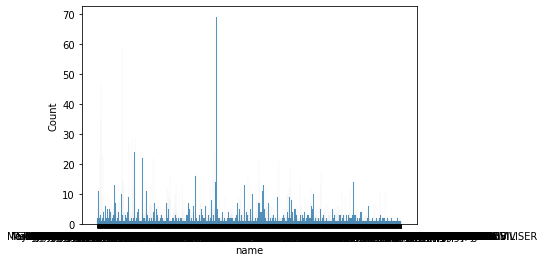

In [ ]:
sns.histplot(df.name)